# Clasificación de Género Musical con Deep Learning

Dataset for Music Analysis

FMA(Free Music Archive) 
https://github.com/mdeff/fma

Analisis y procesamiento de dataset medium de 24GB

La tecnica utilizada para procesamiento "big data" (procesamiento de 24GB con RAM de 4GB) es generar archivos mapeados a memoria virtual


Como alternativa se contruira un generador

## Análisis y procesamiento de audio

In [1]:
import os
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras

In [2]:
#AUDIO_DIR = '/Users/andresmanzalini/Documents/Datasets/FMA/fma_small'
#DATA_DIR = '/Users/andresmanzalini/Documents/Datasets/FMA/fma_metadata'
AUDIO_DIR='/home/andres/Documentos/IA/Datasets/FMA/fma_medium'
DATA_DIR='/home/andres/Documentos/IA/Datasets/FMA/fma_metadata'

LONG_SPECTO = 640 
BINS = 128 


def get_tids_from_directory(audio_dir):
    tids = []
    for _, dirnames, files in os.walk(audio_dir):
        if dirnames == []:
            tids.extend(int(file[:-4]) for file in files if file !='.DS_Store')
    return tids


def get_audio_path(audio_dir, track_id):
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')


In [3]:
tids = get_tids_from_directory(AUDIO_DIR)
print("Cantidad de tracks: ",len(tids))

Cantidad de tracks:  25000


In [4]:
## filtro a partir de 700KB para quedarme con las canciones de LONG_ESPECTO >= 640


def filtrar_por_size(tids,min_size=700000):
    tids_correctos = []
    count=0
    for file in tids:
        fpath = get_audio_path(AUDIO_DIR, file)
        tam = os.path.getsize(fpath)
        if tam > min_size:
            tids_correctos.append(file)
        else:
            print('Track incorrecto: ', fpath, " ,  size: ",tam)
            count += 1
    tids_ok = np.array(tids_correctos, dtype='int64')
    print('Total tracks incorrectos ', count)
    print('Total tracks correctos ', tids_ok.size)
    return tids_ok

In [5]:
tracks_correctos = filtrar_por_size(tids)

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/061/061923.mp3  ,  size:  480328
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/061/061595.mp3  ,  size:  601475
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/061/061896.mp3  ,  size:  479912
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/061/061906.mp3  ,  size:  479952
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/061/061894.mp3  ,  size:  479881
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/061/061596.mp3  ,  size:  601515
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/061/061891.mp3  ,  size:  480308
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/061/061598.mp3  ,  size:  601545
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/061/061897.mp3  ,  size:  479939
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/003

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069/069683.mp3  ,  size:  600467
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069/069303.mp3  ,  size:  481029
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069/069647.mp3  ,  size:  481303
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069/069263.mp3  ,  size:  480981
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069/069682.mp3  ,  size:  600467
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069/069638.mp3  ,  size:  480839
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069/069686.mp3  ,  size:  600467
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069/069291.mp3  ,  size:  480973
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069/069264.mp3  ,  size:  481394
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/069

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/010/010374.mp3  ,  size:  479756
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/010/010377.mp3  ,  size:  480851
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/010/010376.mp3  ,  size:  479758
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/010/010094.mp3  ,  size:  481062
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/010/010357.mp3  ,  size:  481046
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/039/039186.mp3  ,  size:  481363
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/039/039196.mp3  ,  size:  481406
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/039/039377.mp3  ,  size:  480983
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/039/039259.mp3  ,  size:  480930
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/039

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/106/106564.mp3  ,  size:  481316
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/114/114203.mp3  ,  size:  481323
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/083/083065.mp3  ,  size:  601425
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/083/083053.mp3  ,  size:  600876
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/083/083958.mp3  ,  size:  695550
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/083/083690.mp3  ,  size:  480864
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/083/083955.mp3  ,  size:  451276
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/083/083909.mp3  ,  size:  480928
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/130/130014.mp3  ,  size:  480834
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/130

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001/001360.mp3  ,  size:  480423
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001/001896.mp3  ,  size:  463239
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001/001924.mp3  ,  size:  480519
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001/001361.mp3  ,  size:  480897
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001/001634.mp3  ,  size:  601486
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001/001963.mp3  ,  size:  600691
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001/001043.mp3  ,  size:  600988
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001/001366.mp3  ,  size:  481402
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001/001635.mp3  ,  size:  601537
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/001

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040/040080.mp3  ,  size:  601427
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040/040077.mp3  ,  size:  601423
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040/040139.mp3  ,  size:  600960
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040/040701.mp3  ,  size:  600749
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040/040175.mp3  ,  size:  480893
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040/040179.mp3  ,  size:  481331
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040/040353.mp3  ,  size:  481113
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040/040178.mp3  ,  size:  481313
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040/040081.mp3  ,  size:  601415
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/040

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/078/078998.mp3  ,  size:  697778
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/078/078984.mp3  ,  size:  624079
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/078/078993.mp3  ,  size:  561530
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/078/078213.mp3  ,  size:  600909
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/078/078994.mp3  ,  size:  644445
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/078/078997.mp3  ,  size:  651469
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/078/078987.mp3  ,  size:  651372
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/078/078985.mp3  ,  size:  694424
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/078/078995.mp3  ,  size:  600526
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/075

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020/020670.mp3  ,  size:  481316
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020/020926.mp3  ,  size:  432872
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020/020961.mp3  ,  size:  480935
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020/020676.mp3  ,  size:  481374
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020/020668.mp3  ,  size:  481342
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020/020920.mp3  ,  size:  555260
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020/020675.mp3  ,  size:  481327
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020/020469.mp3  ,  size:  511376
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020/020966.mp3  ,  size:  480912
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/020

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118/118052.mp3  ,  size:  643370
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118/118740.mp3  ,  size:  569348
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118/118725.mp3  ,  size:  481213
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118/118056.mp3  ,  size:  669363
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118/118618.mp3  ,  size:  600838
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118/118870.mp3  ,  size:  481305
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118/118048.mp3  ,  size:  655361
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118/118051.mp3  ,  size:  655055
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118/118738.mp3  ,  size:  517658
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/118

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027/027855.mp3  ,  size:  480894
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027/027946.mp3  ,  size:  481214
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027/027457.mp3  ,  size:  600964
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027/027671.mp3  ,  size:  601224
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027/027551.mp3  ,  size:  481283
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027/027668.mp3  ,  size:  601277
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027/027674.mp3  ,  size:  601225
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027/027866.mp3  ,  size:  481266
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027/027572.mp3  ,  size:  611346
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/027

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059/059563.mp3  ,  size:  480834
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059/059584.mp3  ,  size:  642929
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059/059562.mp3  ,  size:  480418
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059/059453.mp3  ,  size:  601473
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059/059454.mp3  ,  size:  601479
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059/059578.mp3  ,  size:  585392
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059/059450.mp3  ,  size:  600950
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059/059587.mp3  ,  size:  570659
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059/059734.mp3  ,  size:  601009
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/059

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044/044095.mp3  ,  size:  497679
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044/044057.mp3  ,  size:  600931
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044/044482.mp3  ,  size:  601433
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044/044805.mp3  ,  size:  601491
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044/044971.mp3  ,  size:  600763
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044/044204.mp3  ,  size:  601360
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044/044056.mp3  ,  size:  601453
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044/044809.mp3  ,  size:  601515
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044/044973.mp3  ,  size:  600766
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/044

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/112/112382.mp3  ,  size:  601401
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/112/112383.mp3  ,  size:  601400
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/112/112384.mp3  ,  size:  601403
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/112/112378.mp3  ,  size:  600853
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/112/112374.mp3  ,  size:  601359
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/112/112380.mp3  ,  size:  600872
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/112/112373.mp3  ,  size:  600834
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/021/021530.mp3  ,  size:  600973
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/021/021159.mp3  ,  size:  676767
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/021

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/032/032915.mp3  ,  size:  480923
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/032/032410.mp3  ,  size:  480914
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/032/032407.mp3  ,  size:  481338
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/050/050819.mp3  ,  size:  600766
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/050/050820.mp3  ,  size:  600777
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/050/050821.mp3  ,  size:  600763
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/050/050409.mp3  ,  size:  563607
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/050/050141.mp3  ,  size:  481392
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/050/050138.mp3  ,  size:  481420
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/050

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/137/137719.mp3  ,  size:  480922
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/137/137539.mp3  ,  size:  600915
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/137/137724.mp3  ,  size:  481355
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/137/137356.mp3  ,  size:  600959
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/137/137720.mp3  ,  size:  481356
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/137/137723.mp3  ,  size:  481356
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/137/137721.mp3  ,  size:  481348
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/137/137541.mp3  ,  size:  600925
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/137/137725.mp3  ,  size:  480961
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/113

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/058/058425.mp3  ,  size:  600928
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/141/141968.mp3  ,  size:  600831
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/141/141970.mp3  ,  size:  600834
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/141/141967.mp3  ,  size:  600374
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/141/141990.mp3  ,  size:  600948
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/141/141304.mp3  ,  size:  601413
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/141/141969.mp3  ,  size:  601351
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/131/131536.mp3  ,  size:  480878
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/131/131817.mp3  ,  size:  673557
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/131

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/129/129882.mp3  ,  size:  601450
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/129/129341.mp3  ,  size:  613246
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/129/129346.mp3  ,  size:  591602
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/129/129342.mp3  ,  size:  541308
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/129/129879.mp3  ,  size:  481282
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/129/129836.mp3  ,  size:  686629
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/120/120921.mp3  ,  size:  600985
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/120/120935.mp3  ,  size:  481313
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/120/120518.mp3  ,  size:  480818
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/120

Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029/029255.mp3  ,  size:  481336
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029/029187.mp3  ,  size:  601479
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029/029334.mp3  ,  size:  600922
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029/029253.mp3  ,  size:  481333
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029/029750.mp3  ,  size:  537906
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029/029396.mp3  ,  size:  600956
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029/029398.mp3  ,  size:  600984
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029/029626.mp3  ,  size:  615629
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029/029045.mp3  ,  size:  480880
Track incorrecto:  /home/andres/Documentos/IA/Datasets/FMA/fma_medium/029

## Metadata con pandas

In [6]:
filepath = DATA_DIR+'/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])


#selecciono columnas del dataframe 
cols = [('set', 'split'),('set', 'subset'),('track', 'genre_top')]


#filtro por columnas
df_medium = tracks[cols]
df_medium = df_medium[df_medium[('set', 'subset')] == 'medium'] 


#filtro por los tracks que superan cierto tamano
df_filtrado = df_medium[df_medium.index.isin(tracks_correctos)]

In [7]:
df_filtrado.head(10)

set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
181           test  medium      Rock
198       training  medium      Folk
208       training  medium      Folk
209       training  medium      Folk
237       training  medium      Jazz
247       training  medium      Rock
249       training  medium      Rock

In [8]:
generos = df_filtrado[('track', 'genre_top')].unique()

generos

array(['Hip-Hop', 'Rock', 'Folk', 'Jazz', 'Electronic', 'Experimental',
       'Soul-RnB', 'Pop', 'Spoken', 'Country', 'Blues', 'Classical',
       'Instrumental', 'Old-Time / Historic', 'International',
       'Easy Listening'], dtype=object)

In [9]:
dict_generos = {}

for g in range(generos.size):
    print(g)
    print(generos[g])
    dict_generos[generos[g]] = g
    

0
Hip-Hop
1
Rock
2
Folk
3
Jazz
4
Electronic
5
Experimental
6
Soul-RnB
7
Pop
8
Spoken
9
Country
10
Blues
11
Classical
12
Instrumental
13
Old-Time / Historic
14
International
15
Easy Listening


In [10]:
dict_generos

generos_menos_representativos = {"Experimental","Spoken",
                                 "Soul-RnB","Country",
                                 "Instrumental","Old-Time / Historic",
                                 "International","Easy Listening"}

In [11]:
dict_generos_final = {}
cont=0

for g in dict_generos:
    if (g not in generos_menos_representativos):
        dict_generos_final.update({g:cont})
        cont+=1


In [12]:
dict_generos_final

{'Hip-Hop': 0,
 'Rock': 1,
 'Folk': 2,
 'Jazz': 3,
 'Electronic': 4,
 'Pop': 5,
 'Blues': 6,
 'Classical': 7}

Aclaracion:

df_filtrado tiene la metadata de todos los tracks a procesar

despues hay que filtrar por generos mas representativos, mas diferenciables


por ej: filtramos Instrumental, Internacional porque no son lo suficientemente representativo (Internacional o Instrumental puede ser cualquier genero);
tambien quitamos Spoken, Old porque son bastante claros de distinguir.

y quedarian como generos mas representativos rock, blues, folk, pop, hip-hop, electronica, 


tanto el jazz como la musica clasica son respectivamente poco y muy representativos. Son agregados para analizar su comportamiento... 


In [13]:
df_train = df_filtrado[df_filtrado[('set', 'split')] == 'training']
df_valid = df_filtrado[df_filtrado[('set', 'split')] == 'validation']
df_test = df_filtrado[df_filtrado[('set', 'split')] == 'test']

print(df_train.shape, df_valid.shape, df_test.shape)

df_train.head()

(12114, 3) (1556, 3) (1610, 3)


set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
198       training  medium      Folk
208       training  medium      Folk

In [14]:
df_train.head(10)

set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
198       training  medium      Folk
208       training  medium      Folk
209       training  medium      Folk
237       training  medium      Jazz
247       training  medium      Rock
249       training  medium      Rock
257       training  medium      Rock

In [15]:
henrys = []
for k in dict_generos_final: 
    print(k)
    henrys.append(k)

henrys

Hip-Hop
Rock
Folk
Jazz
Electronic
Pop
Blues
Classical


['Hip-Hop', 'Rock', 'Folk', 'Jazz', 'Electronic', 'Pop', 'Blues', 'Classical']

# Procesamiento de Audio 

### Librosa

In [16]:
#funcion para crear espectrogramas con librosa
#comparar eficiencia entre librosa y ffmpeg!

def create_spectrogram_librosa(track_id):
    try:
        filepath = get_audio_path(AUDIO_DIR, track_id)

        y, sr = librosa.load(filepath)
        
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        #print('salida del spectro.T ', spect.T[:2,:].shape)
        return spect.T
    except:
        print('ERROR al procesar ', track_id)
        pass

In [17]:
def plot_spect(track_id):
    #filepath = get_audio_path(AUDIO_DIR, track_id)
    #print("filete a procesar ",filepath)
    
    spect = create_spectrogram_librosa(track_id)
    #spect = create_spectrogram_ffmpeg(filepath)
    
    #print("soy algo? ",spect)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

/home/andres/anaconda3/envs/envGeneroMusicalDL/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/andres/anaconda3/envs/envGeneroMusicalDL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/andres/anaconda3/envs/envGeneroMusicalDL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


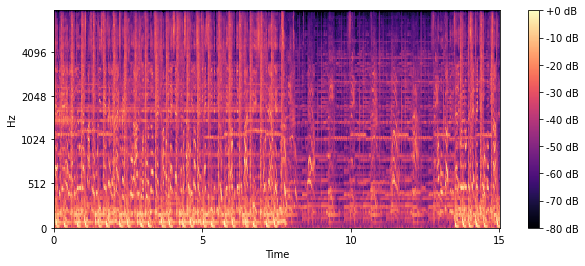

In [18]:
# ejemplo con tid = 3
plot_spect(3)
#img = np.array(create_spectrogram_librosa(2))
#print('img',img.shape)

### FFMPEG

In [19]:
import subprocess as sp

def create_spectrogram_ffmpeg(track_id):
    filepath = get_audio_path(AUDIO_DIR, track_id)

    command = ['ffmpeg','-i', filepath, '-f', 's16le', '-acodec', 'pcm_s16le', '-ac', '1'] # channels 2 for stereo, 1 for mono
    command.append('-')
    # 30s at 44.1 kHz ~= 1.3e6
    try:
        proc = sp.run(command, stdout=sp.PIPE, bufsize=10**7, stderr=sp.DEVNULL, check=True)
        res = np.fromstring(proc.stdout, dtype="int16")
        print('res de fmpegloader ', res) #A VECES SE CEBA
        return res
    except sp.CalledProcessError as e:
        print('FLASHASTE con ',filepath)
        pass


In [20]:
def plot_spect(track_id):
    filepath = get_audio_path(AUDIO_DIR, track_id)
    print("filete a procesar ",filepath)
    
    spect = create_spectrogram_librosa(filepath)
    #spect = create_spectrogram_ffmpeg(filepath)
    
    #print("soy algo? ",spect)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [21]:
# ejemplo con tid = 2
#plot_spect(5)
img = np.array(create_spectrogram_ffmpeg(5))
#img.reshape(BINS, LONG_SPECTO)
#print('img',img.shape)

res de fmpegloader  [   0    0    0 ... 3117 3169 2992]


<ipython-input-19-bb4bf3d0cc12>:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  res = np.fromstring(proc.stdout, dtype="int16")


In [28]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

##reshapear la imagen y dibujarla

#plt.imshow(img)#, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#plt.show()


16.15135498046875


# GENERADOR

## MMF - Archivos mapeados en memoria


A diferencia del generador que hereda de Sequential, el siguiente script aplica paralelismo limitado por memoria virtual.


In [29]:

#list_gen = list(dict_generos.values()) #para TODOS los generos
list_gen = list(dict_generos_final.values()) #para los 8 generos mas representativos
np_gen = np.array(list_gen)
CANT_GENEROS = np_gen.shape[0]
CANT_GENEROS


8

In [30]:
## esta celda es para filtrar la metadata por generos mas representativos
## si no se ejecuta, se clasifica de acuerdo a los 16 generos
## filtro por generos mas representativos


df_sabe = df_filtrado[df_filtrado[('track', 'genre_top')].isin(henrys)]

# en este caso, la ejecuto para filtrar por los generos, a mi parecer, mas representativos

df_train = df_sabe[df_sabe[('set', 'split')] == 'training']
df_valid = df_sabe[df_sabe[('set', 'split')] == 'validation']
df_test = df_sabe[df_sabe[('set', 'split')] == 'test']

print(df_train.shape, df_valid.shape, df_test.shape)

df_train.head()


(10344, 3) (1341, 3) (1306, 3)


set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
198       training  medium      Folk
208       training  medium      Folk

In [31]:
import tensorflow.keras.utils

In [31]:
from tqdm import tqdm

#Creo el arreglo numpy en un archivo mapeado a memoria

"""
npData_x_train = np.memmap('x_train_medium.dat', dtype='float32', mode='w+', shape=(len(df_train), LONG_SPECTO, BINS))
npData_y_train = np.memmap('y_train_medium.dat', dtype='float32', mode='w+', shape=(len(df_train), CANT_GENEROS))

npData_x_valid = np.memmap('x_valid_medium.dat', dtype='float32', mode='w+', shape=(len(df_valid), LONG_SPECTO, BINS))
npData_y_valid = np.memmap('y_valid_medium.dat', dtype='float32', mode='w+', shape=(len(df_valid), CANT_GENEROS))

npData_x_test = np.memmap('x_test_medium.dat', dtype='float32', mode='w+', shape=(len(df_test), LONG_SPECTO, BINS))
npData_y_test = np.memmap('y_test_medium.dat', dtype='float32', mode='w+', shape=(len(df_test), CANT_GENEROS))


for i, track_id in tqdm(enumerate(df_train.index), total=len(df_train)): 
    npData_x_train[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]
    genero = df_train[('track','genre_top')].loc[track_id]
    y_categ = keras.utils.to_categorical(dict_generos.get(genero), CANT_GENEROS)
    npData_y_train[i,:] = y_categ

print("\n Datos de entrenamiento generados correctamente \n\n")
    
    
for i, track_id in tqdm(enumerate(df_valid.index), total=len(df_valid)): 
    npData_x_valid[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]
    genero = df_valid[('track','genre_top')].loc[track_id]
    y_categ = keras.utils.to_categorical(dict_generos.get(genero), CANT_GENEROS)
    npData_y_valid[i,:] = y_categ
    
print("\n Datos de validacion generados correctamente \n\n")


for i, track_id in tqdm(enumerate(df_test.index), total=len(df_test)): 
    npData_x_test[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]
    genero = df_test[('track','genre_top')].loc[track_id]
    y_categ = keras.utils.to_categorical(dict_generos.get(genero), CANT_GENEROS)
    npData_y_test[i,:] = y_categ
    
print("\n Datos de testeo generados correctamente \n\n")


del npData_x_train
del npData_y_train
del npData_x_valid
del npData_y_valid
del npData_x_test
del npData_y_test

"""


'\nnpData_x_train = np.memmap(\'x_train_medium_filtrado.dat\', dtype=\'float32\', mode=\'w+\', shape=(len(df_train), LONG_SPECTO, BINS))\nnpData_y_train = np.memmap(\'y_train_medium_filtrado.dat\', dtype=\'float32\', mode=\'w+\', shape=(len(df_train), CANT_GENEROS))\n\nnpData_x_valid = np.memmap(\'x_valid_medium_filtrado.dat\', dtype=\'float32\', mode=\'w+\', shape=(len(df_valid), LONG_SPECTO, BINS))\nnpData_y_valid = np.memmap(\'y_valid_medium_filtrado.dat\', dtype=\'float32\', mode=\'w+\', shape=(len(df_valid), CANT_GENEROS))\n\nnpData_x_test = np.memmap(\'x_test_medium_filtrado.dat\', dtype=\'float32\', mode=\'w+\', shape=(len(df_test), LONG_SPECTO, BINS))\nnpData_y_test = np.memmap(\'y_test_medium_filtrado.dat\', dtype=\'float32\', mode=\'w+\', shape=(len(df_test), CANT_GENEROS))\n\n\nfor i, track_id in tqdm(enumerate(df_train.index), total=len(df_train)): \n    npData_x_train[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]\n    genero = df_train[(\'track\',\'genre

# MODELADO

In [32]:
import keras
import tensorflow as tf

from keras.layers import Activation, Bidirectional, Input, Dense, concatenate, Conv1D, Conv2D
from keras.layers import GRU, Lambda, MaxPooling1D, MaxPooling2D, LSTM, Flatten, Reshape, Dropout, BatchNormalization
from keras.models import Sequential, Model

from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau


from keras.optimizers import Adam, RMSprop

import multiprocessing as mp

## CRNN - Convolutional Recurrent Neural Network

Modelo secuencial que combina una primera parte convolucional CNN y la parte final recurrente RNN, con LSTM.


https://arxiv.org/pdf/1712.08370.pdf


In [38]:
# Abrir el dataset preprocesado

x_train = np.memmap('x_train_medium_filtrado.dat', dtype='float32', mode='r', shape=(len(df_train), LONG_SPECTO, BINS))  
y_train = np.memmap('y_train_medium_filtrado.dat', dtype='float32', mode='r', shape=(len(df_train), CANT_GENEROS))  

x_valid = np.memmap('x_valid_medium_filtrado.dat', dtype='float32', mode='r', shape=(len(df_valid), LONG_SPECTO, BINS))  
y_valid = np.memmap('y_valid_medium_filtrado.dat', dtype='float32', mode='r', shape=(len(df_valid), CANT_GENEROS))  

x_test = np.memmap('x_test_medium_filtrado.dat', dtype='float32', mode='r', shape=(len(df_test), LONG_SPECTO, BINS))
y_test = np.memmap('y_test_medium_filtrado.dat', dtype='float32', mode='r', shape=(len(df_test), CANT_GENEROS))

#paralelismo limitado por memoria virtual

In [39]:
import functools

top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'

BATCH_SIZE = 16
NOMBRE_MODELO_SEC = "CRNN_medium"
EPOCHS_CRNN = 75

In [40]:

keras.backend.clear_session()

i = Input(shape=(LONG_SPECTO,BINS,))

# Fase convolucional
c1 = Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(i) 
b1 = BatchNormalization(momentum=0.9)(c1) #porque lo dice el paper
p1 = MaxPooling1D(2)(b1)
d1 = Dropout(0.1)(p1) #tambien lo dice el paper


c2 = Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(d1) 
b2 = BatchNormalization(momentum=0.9)(c2)
p2 = MaxPooling1D(2)(b2)
d2 = Dropout(0.1)(p2)


c3 = Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(d2) 
b3 = BatchNormalization(momentum=0.9)(c3)
p3 = MaxPooling1D(2)(b3)
d3 = Dropout(0.1)(p3)


# Fase recurrente
lstm = LSTM(64, return_sequences=False)(d3) 
d4 = Dropout(0.1)(lstm)
    
d = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(d4)
d5 = Dropout(0.1)(d)
    

out = Dense(CANT_GENEROS, activation='softmax')(d5)

model = Model(inputs=i, outputs=out)    

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 640, 128)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 638, 64)           24640     
_________________________________________________________________
batch_normalization (BatchNo (None, 638, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 319, 64)           0         
_________________________________________________________________
dropout (Dropout)            (None, 319, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 317, 64)           12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 317, 64)           256   

In [31]:
opt = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy',top3_acc])
    
model.summary()


checkpoint_callback = ModelCheckpoint('./mejores_pesos_'+NOMBRE_MODELO_SEC+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs.h5', monitor='val_accuracy', verbose=1,
                                          save_best_only=True, mode='max')
    
reducelr_callback = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01)

callbacks = [checkpoint_callback, reducelr_callback]


h = model.fit(x_train, y_train, batch_size=BATCH_SIZE, 
              epochs=EPOCHS_CRNN, verbose=1, validation_data=(x_valid,y_valid), 
              shuffle=True,
              callbacks=callbacks)



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 640, 128)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 638, 64)           24640     
_________________________________________________________________
batch_normalization (BatchNo (None, 638, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 319, 64)           0         
_________________________________________________________________
dropout (Dropout)            (None, 319, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 317, 64)           12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 317, 64)           256   


Epoch 00021: val_accuracy did not improve from 0.81208
Epoch 22/75
647/647 [==============================] - 73s 113ms/step - loss: 0.7288 - accuracy: 0.7882 - top3_acc: 0.9560 - val_loss: 0.8651 - val_accuracy: 0.7151 - val_top3_acc: 0.9269

Epoch 00022: val_accuracy did not improve from 0.81208
Epoch 23/75
647/647 [==============================] - 73s 113ms/step - loss: 0.7312 - accuracy: 0.7851 - top3_acc: 0.9516 - val_loss: 0.8145 - val_accuracy: 0.7502 - val_top3_acc: 0.9389

Epoch 00023: val_accuracy did not improve from 0.81208
Epoch 24/75
647/647 [==============================] - 75s 117ms/step - loss: 0.7190 - accuracy: 0.7864 - top3_acc: 0.9559 - val_loss: 0.7779 - val_accuracy: 0.7599 - val_top3_acc: 0.9485

Epoch 00024: val_accuracy did not improve from 0.81208
Epoch 25/75
647/647 [==============================] - 79s 122ms/step - loss: 0.7306 - accuracy: 0.7845 - top3_acc: 0.9509 - val_loss: 0.6427 - val_accuracy: 0.8106 - val_top3_acc: 0.9590

Epoch 00025: val_accura

In [32]:

model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)


#### RESULTADOS PARA LOS 8 generos mas representativos ####


# LSTM(32)  -> buenos resultados iniciales
    # loss=0.969, acc=0.703, top3=0.921   en 25 epochs con callbacks
    # loss=0.652, acc=0.813, top3=0.946   en 50 epochs con callbacks. upaa.. es uno de los que mas tira
    
    
#LSTM(64)  -> la que va
    # loss=0.693, acc=0.813, top3=0.943   a los 25 epochs sin callbacks?
    # loss=0.621, acc=0.839, top3=0.956   a los 50 epochs con callbacks
    # loss=0.661, acc=0.825, top3=0.950   a los 75 epochs con
    # loss=0.923, acc=0.738, top3=0.934   a los 100 epochs con 

    

82/82 [==============================] - 17s 187ms/step - loss: 0.6614 - accuracy: 0.8254 - top3_acc: 0.9502


[0.6613718271255493, 0.825421154499054, 0.9502297043800354]

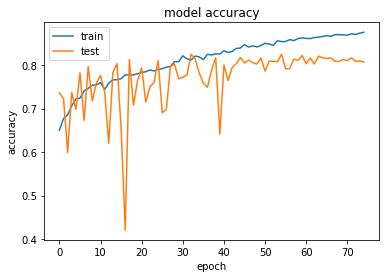

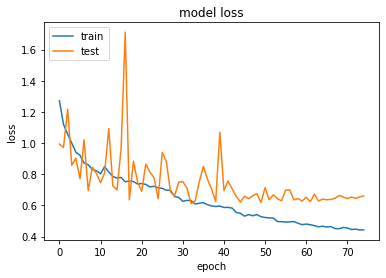

In [34]:
# Summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(NOMBRE_MODELO_SEC+'_LSTM64_acc-val_acc_'+str(EPOCHS_CRNN)+'epochs.jpg')
plt.show()

# Summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(NOMBRE_MODELO_SEC+'_LSTM64_loss-val_loss_'+str(EPOCHS_CRNN)+'epochs.jpg')

plt.show()
      

In [35]:
from keras.models import load_model
import functools

top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


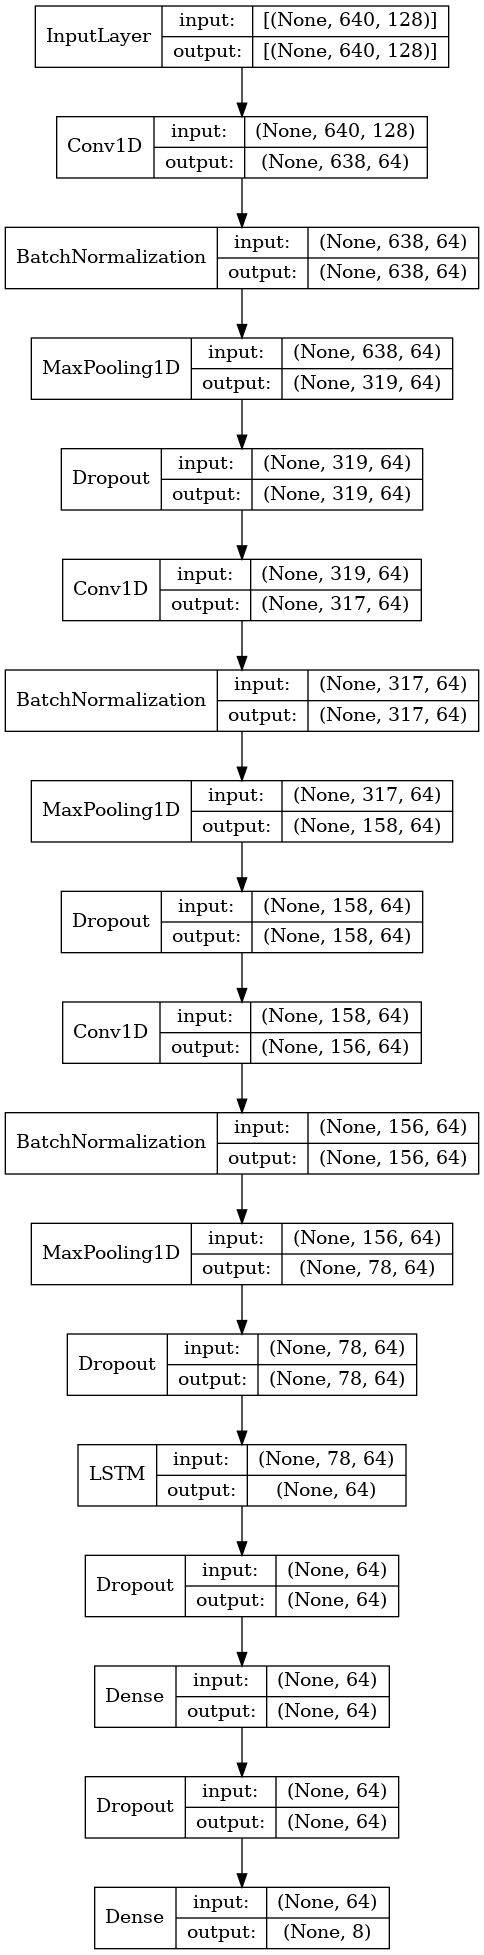

In [44]:
from keras.utils import plot_model

#plot_model(model, to_file=NOMBRE_MODELO_SEC+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs_model.png', show_shapes=True)
plot_model(model, to_file=NOMBRE_MODELO_SEC+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs_model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False,  dpi=96)

In [46]:
import visualkeras

#visualkeras.layered_view(model)
#visualkeras.layered_view(model, to_file='prueba.png').show() # write and show

In [47]:
# Matriz de confusion

from sklearn.metrics import classification_report

#y_true = y_test

y_true = np.argmax(y_test, axis=1) 

print('y true ', y_true)

y_pred = model.predict(x_test) 
y_pred = np.argmax(y_pred, axis=1)
print('y prediccion ', y_pred)

#dict_genres.keys()

y true  [1 1 2 ... 0 0 0]
y prediccion  [1 1 2 ... 4 4 4]


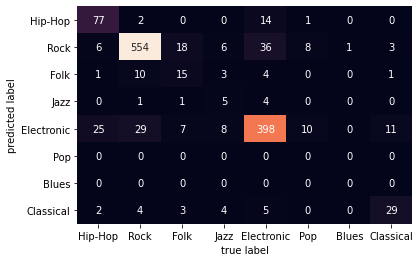

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False,
            xticklabels=dict_generos_final.keys(),
            yticklabels=dict_generos_final.keys())
plt.xlabel('true label')
plt.ylabel('predicted label')
nombre = "matriz_confusion_"+NOMBRE_MODELO_SEC+"_LSTM64_"+str(EPOCHS_CRNN)+"epochs.jpg"
plt.savefig(nombre)

In [49]:
model.save(NOMBRE_MODELO_SEC+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs.h5') 


Podemos ver que la precision individual de genero es buena, de aprox un  .82 
Esto se ve reflejado en generos como electronica, hip-hop y rock, y a menor nivel en clasico

El error de 0.6 es alto, ya que casi siempre confunde generos como jazz, pop y blues. Pero se puede ver que el error decrece a medida que se entrena.


Por esta razon, si se logra identificar los generos mas caracteristicos, este modelo es que que mas proyeccion tiene

### Test CRNN

In [41]:
import functools
from keras.models import load_model

In [43]:
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


##para testear a partir del mismo modelo ya entrenado
model = load_model(NOMBRE_MODELO_SEC+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs.h5', custom_objects={'top3_acc': top3_acc})


In [44]:
!pip install youtube_dl

import youtube_dl

In [33]:
## testeo con un tema de rock experimental
# del maestro Max Ostro

#input_url = "https://www.youtube.com/watch?v=4fVD-KHDSHY" #ej ROCK
#input_url =
#input_url =

video_info = youtube_dl.YoutubeDL().extract_info(url=input_url, download=False)
video_title = video_info['title']

opciones = {
    'format':'bestaudio/best',
    'outtmpl':'/home/andres/Documentos/IA/'+video_title+'.mp3',
    'postprocessors':[{
        'key':'FFmpegExtractAudio',
        'preferredcodec':'mp3',
        'preferredquality':'192'
    }]
}


#with youtube_dl.YoutubeDL(opciones) as ydl:
#    ydl.download([input_url])

[youtube] 4fVD-KHDSHY: Downloading webpage


In [36]:
# BIEN!

# ahora hay que usar el .mp3 

# hay que cortarlo, y tomar la primera muestra de 30s

# luego usar ese vector numpy y predecir genero


/home/andres/anaconda3/envs/envGeneroMusicalDL/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/andres/anaconda3/envs/envGeneroMusicalDL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/andres/anaconda3/envs/envGeneroMusicalDL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


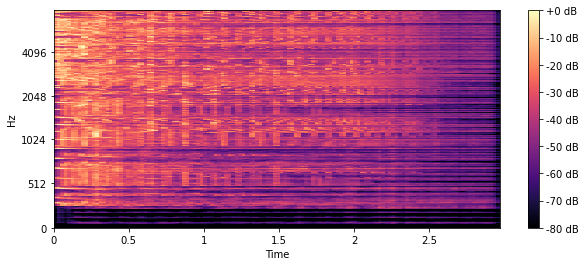

In [47]:
filepath='/home/andres/Documentos/IA/MaxOstro.mp3'

## CON LIBROSA

y, sr = librosa.load(filepath, duration=30)
        
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()



In [48]:
spect

import IPython.display as ipd
#ipd.Audio('/home/andres/Documentos/IA/MaxOstro.mp3')
queonda = ipd.Audio(y,rate=sr) #bien

In [50]:
#Que pedazo de maestro...
#esto deberia clasificarse como... rock

print("formato x_test ",x_test.shape)
print("formato Max Ostro ",spect.T.shape)


formato x_test  (1306, 640, 128)
formato Max Ostro  (646, 128)


In [51]:
prediccion_max_ostro_normalizada = spect.T[:LONG_SPECTO,:]

prediccion_max_ostro_normalizada.shape


(640, 128)

In [52]:
pred = prediccion_max_ostro_normalizada.reshape(1, LONG_SPECTO, BINS)
y_pred = model.predict(pred)
y_pred

array([[0.00237069, 0.8280679 , 0.00528792, 0.04048225, 0.09881423,
        0.01644437, 0.00737839, 0.00115425]], dtype=float32)

In [71]:
genero_pred = np.argmax(y_pred, axis=1)
indice = genero_pred[0]
print('prediccion ', indice)

genero_pred = dict_generos_final.keys()
#print("genero predicho: ",dict_generos_final.get(indice))
print("Genero predicho: ",list(genero_pred)[indice])

prediccion  1
Genero predicho:  Rock


In [ ]:
#BESTIA!

# CNN-RNN en paralelo con GRU


Lin Feng, Shenlan Liu, Jianing Yao

https://arxiv.org/pdf/1712.08370.pdf

In [85]:
from keras import backend as K
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

BATCH_SIZE=16
EPOCHS_CNN_RNN=50
NOMBRE_MODELO_CNN_RNN="CNN_RNN_medium"

In [75]:
#reshapeo a 3D

x_train_3D = np.memmap('x_train_medium_filtrado.dat', dtype='float32', mode='r', shape=(len(df_train), LONG_SPECTO, BINS, 1))  

x_valid_3D = np.memmap('x_valid_medium_filtrado.dat', dtype='float32', mode='r', shape=(len(df_valid), LONG_SPECTO, BINS, 1))  

x_test_3D = np.memmap('x_test_medium_filtrado.dat', dtype='float32', mode='r', shape=(len(df_test), LONG_SPECTO, BINS, 1))  


In [76]:
keras.backend.clear_session()

i = Input(shape=(LONG_SPECTO,BINS,1))


# Bloque Convolucional

c1 = Conv2D(16, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(i) #original 16
p1 = MaxPooling2D((2,2), strides=(2,2))(c1)

c2 = Conv2D(32, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p1) #32
p2 = MaxPooling2D((2,2), strides=(2,2))(c2) 

c3 = Conv2D(64, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p2) #64
p3 = MaxPooling2D((2,2), strides=(2,2))(c3)

c4 = Conv2D(128, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p3) #128
p4 = MaxPooling2D((4,4), strides=(4,4))(c4) 

c5 = Conv2D(64, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p4) #64
p5 = MaxPooling2D((4,4), strides=(4,4))(c5)


f = Flatten()(p5) # esto deberia ser Output(256). BIEN


#Bloque recurrente - Bidireccional GRU 

pool_LSTM = MaxPooling2D(1,2)(i) 

squeezed = Lambda(lambda x: K.squeeze(x, axis=-1))(pool_LSTM) #embedding

lstm = Bidirectional(GRU(32))(squeezed) #deberia ser 128 para generar salida 256


#Concat output
concat = concatenate([f,lstm], axis=-1) 

d = Dense(128, activation='relu')(concat)#, kernel_regularizer=regularizers.l2(0.01))(concat)
#dr = Dropout(0.3)(d) 

out = Dense(CANT_GENEROS, activation='softmax')(d) 


model = Model(outputs=out,inputs=i)

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 640, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 638, 128, 16) 64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 319, 64, 16)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 317, 64, 32)  1568        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [42]:
import functools

top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


#por ej: internacional o instrumental puede ser rock, pop, folk, etc..

model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy',top3_acc]) 



checkpoint_callback = ModelCheckpoint('./mejores_pesos_'+NOMBRE_MODELO_CNN_RNN+'_GRU32_'+str(EPOCHS_CNN_RNN)+'epochs.h5', monitor='val_accuracy', verbose=1,
                                          save_best_only=True, mode='max')
    
reducelr_callback = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01)

callbacks = [checkpoint_callback, reducelr_callback]



h = model.fit(x_train_3D, y_train, batch_size=BATCH_SIZE, 
              epochs=EPOCHS_CNN_RNN, verbose=1, validation_data=(x_valid_3D,y_valid), 
              shuffle=True,  callbacks=callbacks)



Epoch 1/25
647/647 [==============================] - 667s 1s/step - loss: 1.4428 - accuracy: 0.5374 - top3_acc: 0.8790 - val_loss: 1.3620 - val_accuracy: 0.4825 - val_top3_acc: 0.8725

Epoch 00001: val_accuracy improved from -inf to 0.48248, saving model to ./mejores_pesos_CNN_RNN_medium_GRU32_25epochs.h5
Epoch 2/25
647/647 [==============================] - 601s 930ms/step - loss: 0.9576 - accuracy: 0.6606 - top3_acc: 0.9264 - val_loss: 0.7786 - val_accuracy: 0.7263 - val_top3_acc: 0.9441

Epoch 00002: val_accuracy improved from 0.48248 to 0.72632, saving model to ./mejores_pesos_CNN_RNN_medium_GRU32_25epochs.h5
Epoch 3/25
647/647 [==============================] - 571s 883ms/step - loss: 0.8709 - accuracy: 0.7027 - top3_acc: 0.9380 - val_loss: 0.7149 - val_accuracy: 0.7554 - val_top3_acc: 0.9389

Epoch 00003: val_accuracy improved from 0.72632 to 0.75541, saving model to ./mejores_pesos_CNN_RNN_medium_GRU32_25epochs.h5
Epoch 4/25
647/647 [==============================] - 533s 823ms

### Resultados CNN-RNN

In [43]:

model.evaluate(x_test_3D, y_test)


41/41 [==============================] - 24s 514ms/step - loss: 1.4899 - accuracy: 0.7818 - top3_acc: 0.9418


[1.4899444580078125, 0.7817764282226562, 0.9418070316314697]

In [34]:
# RESULTADOS
        
    
# GRU(32) => buenos resultados iniciales!  aplicando callbacks
    # loss=0.710, acc=0.795, top3=0.944 en 20 epochs  -> como?! una locura..
    # loss=0.971, acc=0.705, top3=0.922 en 50 epochs  -> mmm...
    # loss=1.380, acc=0.817, top3=0.951 en 100 epochs -> mucha perdida
    

dict_keys(['loss', 'accuracy', 'top3_acc', 'val_loss', 'val_accuracy', 'val_top3_acc', 'lr'])


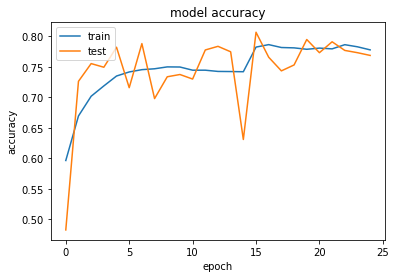

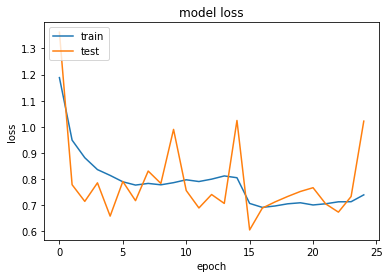

In [44]:
print(h.history.keys())

# Summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
nombre_acc = NOMBRE_MODELO_CNN_RNN+"_acc-val_acc_"+str(EPOCHS_CNN_RNN)+"epochs.jpg"
plt.savefig(nombre_acc)
#plt.savefig('CNN-RNN_medium_loss-val_loss_20epochs.jpg')
plt.show()

# Summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
nombre_loss = NOMBRE_MODELO_CNN_RNN+"_loss-val_loss_"+str(EPOCHS_CNN_RNN)+"epochs.jpg"
plt.savefig(nombre_loss)
plt.show()


In [45]:
predicciones = model.predict(x_test_3D, batch_size=BATCH_SIZE)


In [37]:
#preds = np.argmax(predicciones)
#predicciones[:5,:]   #head
np.argmax(predicciones[:10,:], axis=1)   #tail


array([1, 4, 1, 1, 2, 1, 1, 1, 1, 1])

In [38]:
#df_test.head()
df_test.head()

set             track
         split  subset genre_top
track_id                        
181       test  medium      Rock
564       test  medium      Rock
891       test  medium      Folk
893       test  medium      Folk
894       test  medium      Folk

In [39]:
import functools
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'

#model = load_model('genreRecognition.h5', custom_objects={'top3_acc': top3_acc})

In [40]:

from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis=1)

#print('y true ', y_true)

y_pred = model.predict(x_test_3D) 
y_pred_3D = np.argmax(y_pred, axis=1)
#print('y prediccion ', y_pred_3D)

#dict_genres.keys()

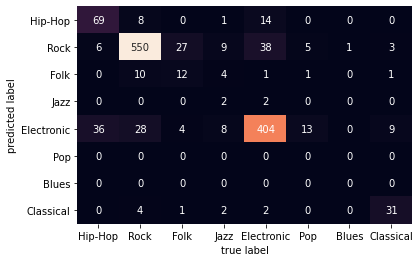

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(y_true, y_pred_3D)
sns.heatmap(mat.T , annot=True, fmt='d', cbar=False,
            xticklabels=dict_generos_final.keys(),
            yticklabels=dict_generos_final.keys())
plt.xlabel('true label')
plt.ylabel('predicted label')
nombre_mat = "matriz_confusion_"+NOMBRE_MODELO_CNN_RNN+"_"+str(EPOCHS_CNN_RNN)+"epochs.jpg"
plt.savefig(nombre_mat)

In [42]:
model.save(NOMBRE_MODELO_CNN_RNN+"_"+str(EPOCHS_CNN_RNN)+"epochs.h5")

CONCLUSION CNN-RNN

Los mejores resultados los presenta la capa GRU(32) 

La precision es buena, de una 0.82 ??
El problema es la perdida, que es demasiado alta, de un 0.6

Eso significaria que hay generos similares a nivel espectrograma pero con distinta clasificacion.

Podemos ver que clasifica bien rock, hip-hop y electronica, pero no pop.
El algoritmo asociar blues, folk y pop con rock; o tambien pop, folk y hip-hop en electronica.

Por esta razon se decidio usar la metrica top3.

### Test CNN-RNN

In [72]:
import functools
from keras.models import load_model

In [86]:
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


##para testear a partir del mismo modelo ya entrenado
model_CNN_RNN = load_model(NOMBRE_MODELO_CNN_RNN+"_"+str(EPOCHS_CNN_RNN)+"epochs.h5", custom_objects={'top3_acc': top3_acc})


In [87]:
import youtube_dl

In [ ]:
#celda para descargar audio de video 

input_url = "https://www.youtube.com/watch?v=4fVD-KHDSHY"

video_info = youtube_dl.YoutubeDL().extract_info(url=input_url, download=False)
video_title = video_info['title']

opciones = {
    'format':'bestaudio/best',
    'outtmpl':'/home/andres/Documentos/IA/'+video_title+'.mp3',
    'postprocessors':[{
        'key':'FFmpegExtractAudio',
        'preferredcodec':'mp3',
        'preferredquality':'192'
    }]
}


#with youtube_dl.YoutubeDL(opciones) as ydl:
#    ydl.download([input_url])

/home/andres/anaconda3/envs/envGeneroMusicalDL/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/andres/anaconda3/envs/envGeneroMusicalDL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/andres/anaconda3/envs/envGeneroMusicalDL/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


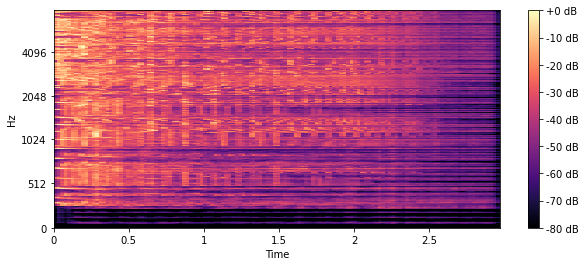

In [88]:
filepath='/home/andres/Documentos/IA/MaxOstro.mp3'

## CON LIBROSA

y, sr = librosa.load(filepath, duration=30)
        
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()



In [89]:
spect

import IPython.display as ipd
#ipd.Audio('/home/andres/Documentos/IA/MaxOstro.mp3')
queonda = ipd.Audio(y,rate=sr) #bien

In [91]:
#Que pedazo de maestro...
#esto deberia clasificarse como... rock

print("formato x_test ",x_test.shape)
print("formato Max Ostro ",spect.T.shape)


formato x_test  (1306, 640, 128)
formato Max Ostro  (646, 128)


In [92]:
prediccion_max_ostro_normalizada = spect.T[:LONG_SPECTO,:]

prediccion_max_ostro_normalizada.shape


(640, 128)

In [93]:
pred = prediccion_max_ostro_normalizada.reshape(1, LONG_SPECTO, BINS)
y_pred = model.predict(pred)
y_pred

array([[4.0298948e-01, 5.4682362e-01, 1.6620732e-03, 5.3203054e-04,
        4.5944542e-02, 1.9983756e-03, 4.9841205e-05, 1.4751468e-10]],
      dtype=float32)

In [94]:
genero_pred = np.argmax(y_pred, axis=1)
indice = genero_pred[0]
print('prediccion ', indice)

genero_pred = dict_generos_final.keys()
#print("genero predicho: ",dict_generos_final.get(indice))
print("Genero predicho: ",list(genero_pred)[indice])

prediccion  1
Genero predicho:  Rock


In [95]:
#IDOLO!

# Conclusiones

Respecto al procesamiento del dataset, Generador como archivos mapeados a memoria es mucho mas rapido que un generador tradicional.

La razon es que archivos mapeados a memoria trabaja con la virtualizacion de la memoria, y le encarga todo el trabajo de paralelismmo a la RAM.

En cambio, un generador tradicional consume batches de datos y los asigna un espacio en RAM. En este espacio asignado va poniendo y sacando bloques de procesamiento (BATCHES) de forma concurrente. 
De forma secuencial Es mas lento, pero mas "seguro", en el sentido de que no te satura la RAM.
De forma paralela, hay que hacer un generador que procese la data en 4 hilos   


Por el lado de los modelos, el modelo secuencial CRNN es el que mejores resultados tiene, ya que es mas rapido y presenta una tendencia de alza en la precision; por el lado del modelo paralelo CNN-RNN, es mas util para un entrenamiento rapido, pero es mas lento el procesamiento y se estanca a los 80epochs, a partir del cual empieza a crecer la perdida. 


## Objetivo: Generacion de musica con Redes Neuronales Generativas

## Generative adversarial neural networks

In [ ]:
#https://medium.com/neuronio/audio-generation-with-gans-428bc2de5a89